# **PLANT DISEASE DETECTION - TOMATO**

**This Dataset Consists of 10 Different classes of Tomato Leafs which contains Disease**:

0.Tomato_Bacterial_spot

1.Tomato_Early_blight,

2.Tomato_Late_blight,

3.Tomato_Leaf_Mold

4.Tomato_Septoria_leaf_spot,

5.Tomato_Spider_mites_Two_spotted_spider_mite

6.Tomato__Target_Spot

7.Tomato__Tomato_YellowLeaf__Curl_Virus

8.Tomato__Tomato_mosaic_virus

9.Tomato_healthy

In [ ]:
import numpy as np 
import pandas as pd
from google.colab import output
from google.colab import drive
import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
%matplotlib inline

import PIL
from PIL import Image

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import glob
import os

In [ ]:
original_data_path = "/content/drive/MyDrive/PlantVillage"
train_pct = 0.8
test_pct = 0.1
val_pct = 0.1

if os.path.isdir("/content/messidor2/messidor-2/train/0") is False:
    # create folders for the sets
    os.mkdir("/content/drive/MyDrive/PlantVillage/train")
    os.mkdir("/content/drive/MyDrive/PlantVillage/test")
    os.mkdir("/content/drive/MyDrive/PlantVillage/validation")
    for i in range(0, 10):
        # path to inputs with different classes
        num_folder_path = f'{original_data_path}/{i}' 
        num_files_in_folder = len(os.listdir(num_folder_path))
        train_size1 = int(num_files_in_folder * train_pct)
        test_size1 = int(num_files_in_folder * test_pct)
        val_size = int(num_files_in_folder * val_pct)
        train_size = train_size1
        test_size = test_size1
        os.mkdir(f'/content/drive/MyDrive/PlantVillage/train/{i}')
        os.mkdir(f'/content/drive/MyDrive/PlantVillage/test/{i}')
        os.mkdir(f'/content/drive/MyDrive/PlantVillage/validation/{i}')
        test_samples = random.sample(os.listdir(num_folder_path), test_size)
        for file_name in test_samples:
            shutil.move((f"/content/drive/MyDrive/PlantVillage/{i}/{file_name}"), f'/content/drive/MyDrive/PlantVillage/test/{i}')
        val_samples = random.sample(os.listdir(num_folder_path), val_size)
        for file_name in val_samples:
            shutil.move((f"/content/drive/MyDrive/PlantVillage/{i}/{file_name}"), f'/content/drive/MyDrive/PlantVillage/validation/{i}')    
        train_samples = random.sample(os.listdir(num_folder_path), train_size)
        for file_name in train_samples:
            shutil.move((f"/content/drive/MyDrive/PlantVillage/{i}/{file_name}"), f'/content/drive/MyDrive/PlantVillage/train/{i}')

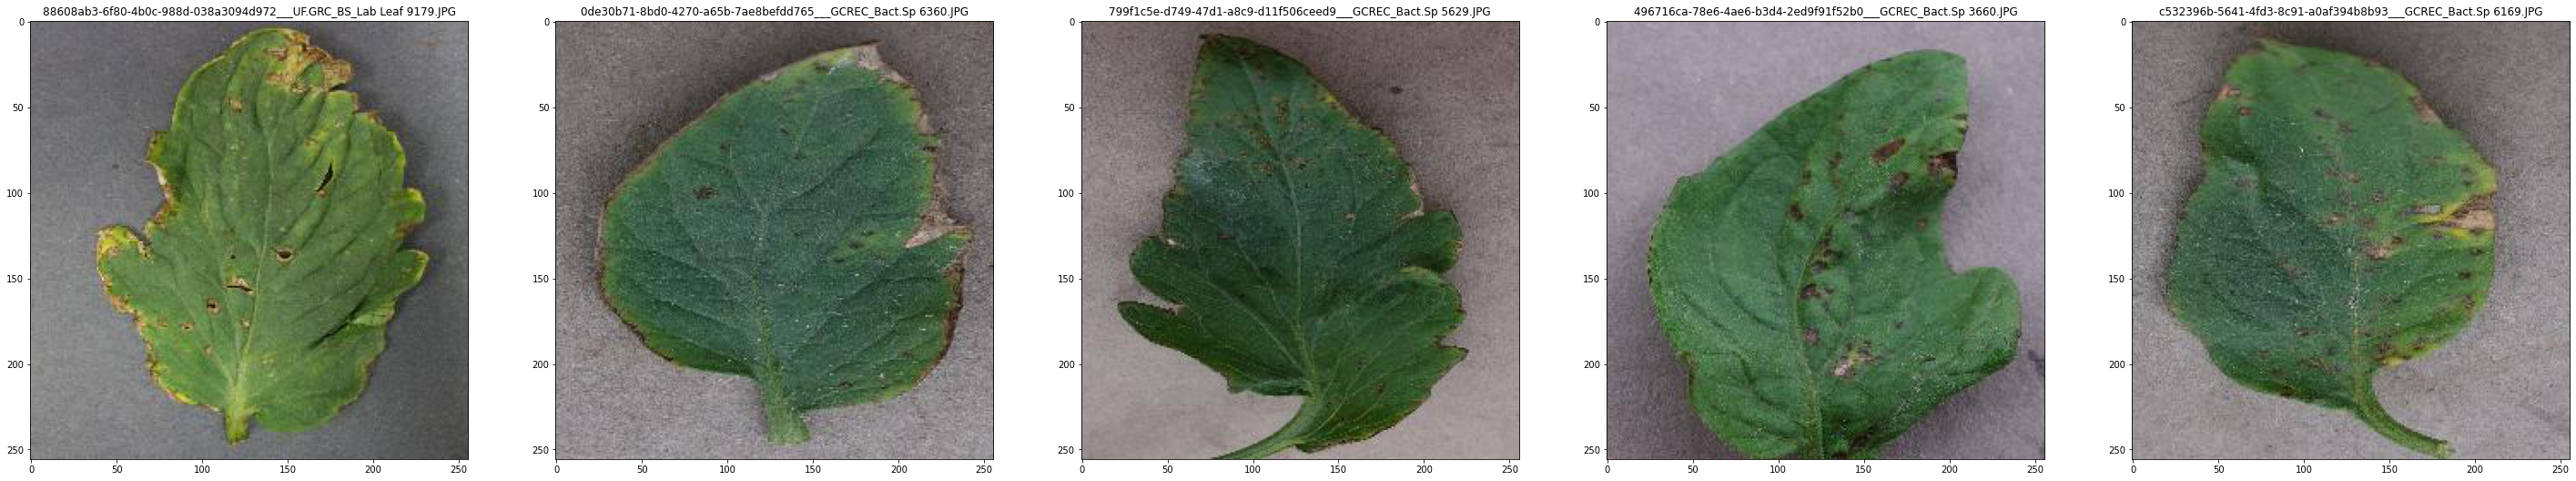

In [ ]:
plt.figure(figsize=(50,30))
test_folder=r'/content/drive/MyDrive/PlantVillage/train/0'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
plt.figure(figsize=(50,30))
test_folder=r'/content/drive/MyDrive/PlantVillage/test/1'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras import optimizers,initializers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
train_path = "/content/drive/MyDrive/PlantVillage/train"
test_path = "/content/drive/MyDrive/PlantVillage/test"
val_path = "/content/drive/MyDrive/PlantVillage/validation"

In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

In [ ]:
print('total images for training :', count(train_path))
print('total images for validation :', count(val_path))

total images for training : /content/drive/MyDrive/PlantVillage/train : 12823files
total images for validation : /content/drive/MyDrive/PlantVillage/validation : 1599files


In [ ]:
import os
t = 0
for i in os.listdir("/content/drive/MyDrive/PlantVillage/train"):
  t = t  + 1
t

10

# **RESNET101**


In [ ]:
from tensorflow.keras.applications.resnet import ResNet101

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
model = ResNet101(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

171458560/171446536 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
folders=t
print("NUmber of folders = ",t)

NUmber of folders =  10


In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1000, activation='relu')(flat1)
class2 = Dense(500, activation='relu')(class1)
output = Dense(folders, activation='softmax')(class2)


# define new model
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import preprocess_input


BATCH_SIZE = 32

train_generator = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) 

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [ ]:
class_subset = sorted(os.listdir('/content/drive/MyDrive/PlantVillage/train/'))
print(class_subset)
traingen = train_generator.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=5)

validgen = train_generator.flow_from_directory(val_path,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=4)

testgen = test_generator.flow_from_directory(test_path,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=4)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Found 10902 images belonging to 10 classes.
Found 236 images belonging to 10 classes.
Found 1599 images belonging to 10 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
optim_1 = Adam(learning_rate=0.001)

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 7

# ModelCheckpoint callback - save best weights
resnet_checkpoint = ModelCheckpoint(filepath='resnet_bestmodel.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy',
                                  mode='max',
                                  verbose=2)

# EarlyStopping
early_stop = EarlyStopping(monitor='loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')


resnet_history = model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[resnet_checkpoint], 
                            verbose=1)

Epoch 1/7
340/340 [==============================] - ETA: 0s - loss: 4.1009 - accuracy: 0.5687 
Epoch 1: val_accuracy improved from -inf to 0.63393, saving model to resnet_bestmodel.hdf5
340/340 [==============================] - 5244s 15s/step - loss: 4.1009 - accuracy: 0.5687 - val_loss: 1.2625 - val_accuracy: 0.6339
Epoch 2/7
340/340 [==============================] - ETA: 0s - loss: 0.9105 - accuracy: 0.7050
Epoch 2: val_accuracy improved from 0.63393 to 0.70536, saving model to resnet_bestmodel.hdf5
340/340 [==============================] - 249s 731ms/step - loss: 0.9105 - accuracy: 0.7050 - val_loss: 0.8593 - val_accuracy: 0.7054
Epoch 3/7
340/340 [==============================] - ETA: 0s - loss: 0.8007 - accuracy: 0.7325
Epoch 3: val_accuracy did not improve from 0.70536
340/340 [==============================] - 243s 713ms/step - loss: 0.8007 - accuracy: 0.7325 - val_loss: 1.0116 - val_accuracy: 0.6875
Epoch 4/7
340/340 [==============================] - ETA: 0s - loss: 0.716

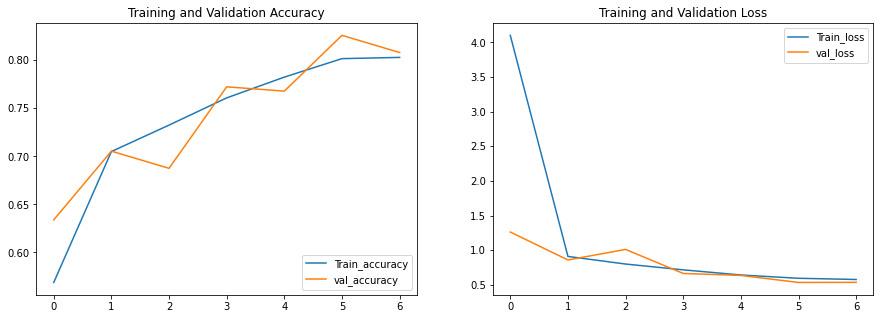

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.legend(['Train_accuracy','val_accuracy'],loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.legend(['Train_loss','val_loss'],loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
# Generate predictions
model.load_weights('resnet_bestmodel.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

resnet_preds = model.predict(testgen)
resnet_pred_classes = np.argmax(resnet_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

resnet_acc = accuracy_score(true_classes, resnet_pred_classes)
print("RESNET101 Model Accuracy: {:.2f}%".format(resnet_acc * 100))

RESNET101 Model Accuracy: 82.68%


# **Confusion Matrix**

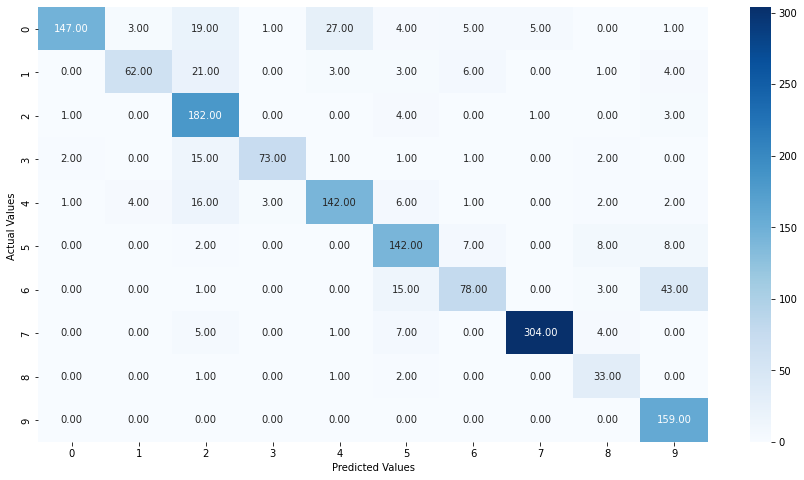

In [ ]:
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(15,8))

cm = confusion_matrix(true_classes,resnet_pred_classes)

ax=sns.heatmap(cm,annot = True,fmt = '.2f',cmap="Blues")

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

**Sample Prediction**

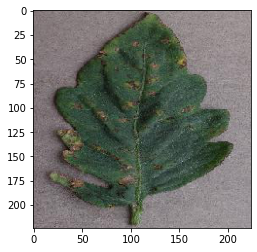

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/drive/MyDrive/PlantVillage/validation/0/0ab9c705-f29e-45ac-b786-9549b3c38f16___GCREC_Bact.Sp 3223.JPG', target_size=(224, 224))
plt.imshow(image)
plt.show()

In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the model
image = preprocess_input(image)
yhat = model.predict(image)
print(yhat)

[[5.83133459e-01 1.51462015e-02 1.59431347e-05 2.69229087e-04
  1.99039072e-01 1.04243169e-02 1.91969022e-01 2.77327968e-06
  1.86157393e-25 1.47941239e-23]]


In [ ]:
label = np.argmax(yhat)
print(class_subset[label] )

0
